In [1]:
import toml
from NEW_cabm_agents import ConsumerModel
from joint_calendar import generate_joint_ad_promo_schedule
from ad_helpers import generate_brand_ad_channel_map

In [2]:
config = toml.load("config.toml")

In [3]:
# Set up household parameters
household_sizes = config["household"]["household_sizes"]
household_size_distribution = config["household"]["household_size_distribution"]
base_consumption_rate = config["household"]["base_consumption_rate"]
pantry_min_percent = config["household"]["pantry_min_percent"]

# Set up retail environment
brand_list = list(config["brands"].keys())
brand_market_share = [
    config["brands"][brand]["current_market_share"] for brand in brand_list
]
try:
    assert round(sum(brand_market_share), 2) == 1.0
except AssertionError:
    print("Error: Brand market shares do not sum to 1.")


# Set up advertising and promotion
ad_decay_factor = config["household"]["ad_decay_factor"]
joint_calendar = generate_joint_ad_promo_schedule(brand_list, config)
brand_channel_map = generate_brand_ad_channel_map(brand_list, config)
channel_set = set(
    channel for channels in brand_channel_map.values() for channel in channels
)
channel_priors = [
    config["household"]["base_channel_preferences"][channel] for channel in channel_set
]

In [4]:
model = ConsumerModel(1000)

In [5]:
for i in range(110):
    model.step()

In [7]:
model_df = model.datacollector.get_model_vars_dataframe()

In [10]:
model_df

,Total_Purchases,Average_Product_Price,Week_Number
0,0,5.00,1
1,397,2.50,2
2,886,2.50,3
3,907,2.50,4
4,959,3.75,5
...,...,...,...
105,934,2.50,2
106,910,2.50,3
107,885,2.50,4
108,904,3.75,5


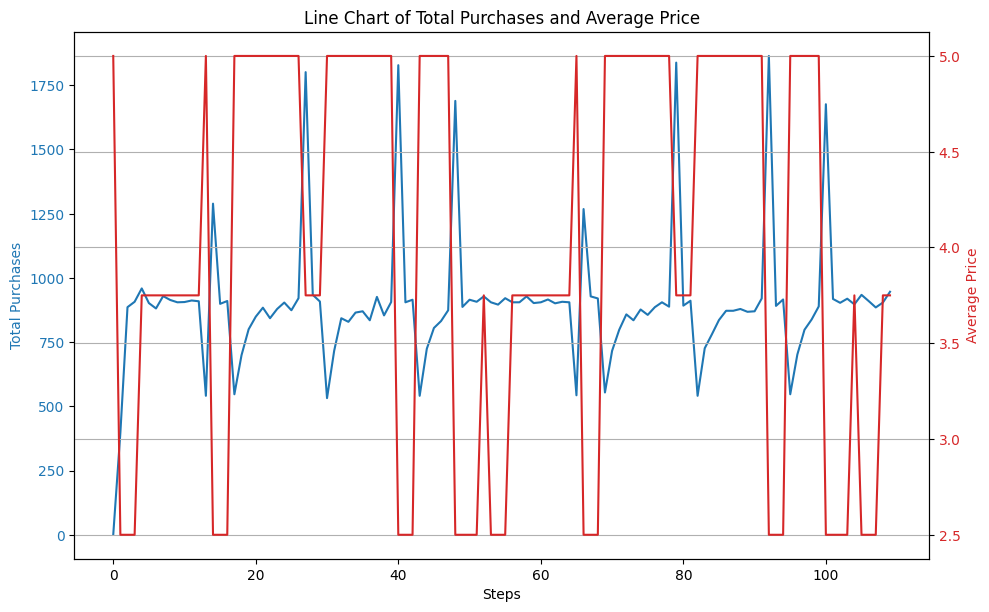

In [12]:

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.set_xlabel('Steps')
ax1.set_ylabel('Total Purchases', color=color)
ax1.plot(model_df['Total_Purchases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Average Price', color=color)  # we already handled the x-label with ax1
ax2.plot(model_df['Average_Product_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Line Chart of Total Purchases and Average Price')
plt.grid(True)
plt.show()

In [7]:
agent_summary_df = model.datacollector.get_agent_vars_dataframe()

In [8]:
agent_summary_df

Household_Size  ...  Last_Product_Price
Step AgentID                  ...                    
0    0                     2  ...                 5.0
     1                     2  ...                 5.0
     2                     1  ...                 5.0
     3                     3  ...                 5.0
     4                     3  ...                 5.0
...                      ...  ...                 ...
99   95                    5  ...                 5.0
     96                    1  ...                 5.0
     97                    2  ...                 5.0
     98                    2  ...                 5.0
     99                    4  ...                 5.0

[10000 rows x 9 columns]